# Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# EDA of DATA

In [5]:
df = pd.read_csv('/content/Student Drop out dataset.csv',index_col=0)
df.head()

,Student ID,Student Name,Library,Resources,Finance,Scholarships,Study Time,Study Group,GPA,Test,Assignment,Graduated
0,1324,David Abbott,Average,Online,Paid,No,Average,Tier 3,2.07,5.1,9.1,Drop out
1,1325,John Ward,Poor,Online,Unpaid,No,Excellent,Tier 1,1.96,10.9,7.8,Drop out
2,1326,Sarah James,Good,Online,Paid,No,Poor,Tier 2,3.77,9.3,6.6,Graduated
3,1327,John Zhang,Good,Offline,Paid,No,Average,Tier 1,1.82,14.6,6.2,Drop out
4,1328,Holly Leonard,Poor,Hybrid,Paid,No,Poor,Tier 1,3.22,14.6,10.9,Graduated


In [6]:
df.dtypes

,0
Student ID,int64
Student Name,object
Library,object
Resources,object
Finance,object
Scholarships,object
Study Time,object
Study Group,object
GPA,float64
Test,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student ID    25000 non-null  int64  
 1   Student Name  25000 non-null  object 
 2   Library       25000 non-null  object 
 3   Resources     25000 non-null  object 
 4   Finance       25000 non-null  object 
 5   Scholarships  25000 non-null  object 
 6   Study Time    25000 non-null  object 
 7   Study Group   25000 non-null  object 
 8   GPA           25000 non-null  float64
 9   Test          25000 non-null  float64
 10  Assignment    25000 non-null  float64
 11  Graduated     25000 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.5+ MB


In [9]:
df.drop(['Student ID','Student Name'],axis=1,inplace=True)
df.head()

,Library,Resources,Finance,Scholarships,Study Time,Study Group,GPA,Test,Assignment,Graduated
0,Average,Online,Paid,No,Average,Tier 3,2.07,5.1,9.1,Drop out
1,Poor,Online,Unpaid,No,Excellent,Tier 1,1.96,10.9,7.8,Drop out
2,Good,Online,Paid,No,Poor,Tier 2,3.77,9.3,6.6,Graduated
3,Good,Offline,Paid,No,Average,Tier 1,1.82,14.6,6.2,Drop out
4,Poor,Hybrid,Paid,No,Poor,Tier 1,3.22,14.6,10.9,Graduated


In [11]:
df.describe()

,GPA,Test,Assignment
count,25000.000000,25000.000000,25000.000000
mean,3.005058,9.998700,9.985768
std,1.156037,2.887467,2.894145
min,1.000000,5.000000,5.000000
25%,2.020000,7.500000,7.500000
50%,3.000000,10.000000,10.000000
75%,4.010000,12.500000,12.500000
max,5.000000,15.000000,15.000000


(array([ 7293.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17707.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

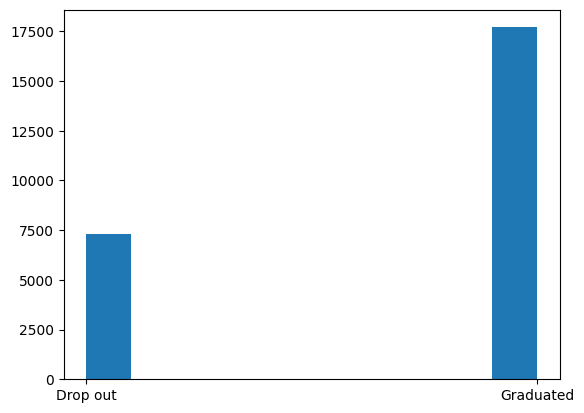

In [12]:
plt.hist(df['Graduated'])

<Axes: xlabel='Library', ylabel='GPA'>

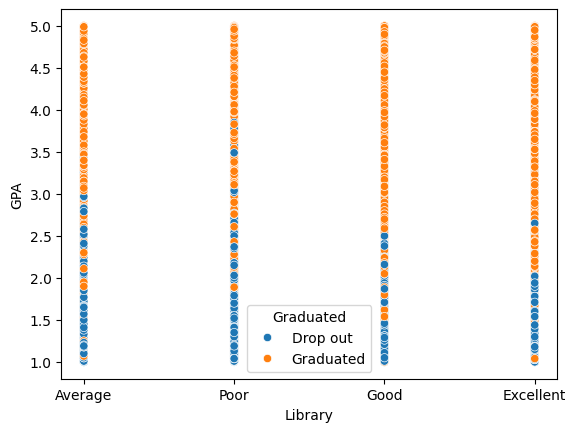

In [14]:
tdc = sns.scatterplot(x='Library', y='GPA', data=df, hue='Graduated')
tdc

In [16]:
len(df[(df['GPA']>=3.5) & (df['Graduated']=='Drop out')])

76

# Data Processing

In [18]:
#Converting label class to numeric values
df['Graduated'] = df['Graduated'].replace(['Graduated','Drop out'],[1,0])

,Graduated
0,0
1,0
2,1
3,0
4,1
...,...
24995,0
24996,1
24997,1
24998,1


In [21]:
df[['GPA','Test','Assignment','Graduated']].corr()

,GPA,Test,Assignment,Graduated
GPA,1.000000,-0.001451,0.000369,0.652439
Test,-0.001451,1.000000,0.000103,0.244240
Assignment,0.000369,0.000103,1.000000,0.245956
Graduated,0.652439,0.244240,0.245956,1.000000


In [22]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,GPA,Test,Assignment,Graduated,Library_Excellent,Library_Good,Library_Poor,Resources_Offline,Resources_Online,Finance_Unpaid,Scholarships_Yes,Study Time_Excellent,Study Time_Good,Study Time_Poor,Study Group_Tier 2,Study Group_Tier 3
0,2.07,5.1,9.1,0,False,False,False,False,True,False,False,False,False,False,False,True
1,1.96,10.9,7.8,0,False,False,True,False,True,True,False,True,False,False,False,False
2,3.77,9.3,6.6,1,False,True,False,False,True,False,False,False,False,True,True,False
3,1.82,14.6,6.2,0,False,True,False,True,False,False,False,False,False,False,False,False
4,3.22,14.6,10.9,1,False,False,True,False,False,False,False,False,False,True,False,False


In [24]:
target_corr = df.corr()['Graduated'].sort_values(ascending=False)
target_corr

,Graduated
Graduated,1.000000
GPA,0.652439
Assignment,0.245956
Test,0.244240
Study Group_Tier 3,0.114223
Study Time_Excellent,0.076859
Library_Excellent,0.070313
Finance_Unpaid,0.047360
Library_Good,0.028237
Study Time_Good,0.024597


In [25]:
X = df.drop('Graduated',axis=1)
y = df['Graduated']

In [28]:
#normalization of input
scalar = MinMaxScaler()

X_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
X_scaled.head()

,GPA,Test,Assignment,Library_Excellent,Library_Good,Library_Poor,Resources_Offline,Resources_Online,Finance_Unpaid,Scholarships_Yes,Study Time_Excellent,Study Time_Good,Study Time_Poor,Study Group_Tier 2,Study Group_Tier 3
0,0.2675,0.01,0.41,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2400,0.59,0.28,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.6925,0.43,0.16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.2050,0.96,0.12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5550,0.96,0.59,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=108)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 15), (5000, 15), (20000,), (5000,))

# Model Building

In [30]:
tf.random.set_seed(108)

model_1 = Sequential([
    Dense(16, activation='relu', input_shape=[len(X_train.columns)]),
    Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 =model_1.fit(X_train, y_train, epochs=100, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7020 - loss: 0.5654 - val_accuracy: 0.8700 - val_loss: 0.3339
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8940 - loss: 0.2815 - val_accuracy: 0.9385 - val_loss: 0.1893
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9462 - loss: 0.1749 - val_accuracy: 0.9645 - val_loss: 0.1363
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1308 - val_accuracy: 0.9810 - val_loss: 0.1072
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.1057 - val_accuracy: 0.9862 - val_loss: 0.0893
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9836 - loss: 0.0897 - val_accuracy: 0.9887 - val_loss: 0.0770
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0788 - val_accuracy: 0.9910 - val_loss: 0.0682
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0708 - val_accu

In [31]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821 (3.21 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 548 (2.14 KB)

# Evaluating model

In [32]:
eval_model = model_1.evaluate(X_test, y_test)
eval_model

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9987 - loss: 0.0122


[0.013469495810568333, 0.9977999925613403]

In [33]:
y_pred = model_1.predict(X_test).flatten()
y_pred = np.round(y_pred).astype(int)
y_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([0, 0, 1, ..., 1, 1, 1])

In [34]:
df_prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_prediction

,Actual,Predicted
12381,0,0
15330,0,0
24365,1,1
24634,1,1
2004,1,1
...,...,...
490,1,1
259,1,1
15237,1,1
9568,1,1


In [42]:
#number of missclassification
miss_class = len(df_prediction[(df_prediction['Actual']!=df_prediction['Predicted'])])
print('Number of miss-classification ',miss_class)

number of miss-classification  11


In [45]:
eval = confusion_matrix(y_test,y_pred)
print(eval)

[[1447    7]
 [   4 3542]]


In [46]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1454
           1       1.00      1.00      1.00      3546

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

